# Applied Artificial Intelligence Coursework Submission (Implementation)
##### Name - Vedant Thakur
##### NTU ID - N1288583

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [3]:
df_train = pd.read_csv('train/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('test/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Pre-Processing and Cleaning

In [5]:
df_train.shape

(60000, 785)

In [6]:
df_test.shape

(10000, 785)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
# Checking if any pixel column has outliers, pixel ranges from (0,255)
pixel_columns = df_train.columns[1:]
outliers =  (df_train[pixel_columns] > 255).any().any() or (df_train[pixel_columns] < 0).any().any()
print(outliers)

False


In [10]:
# Normalising the pixel values
X_train = df_train.drop('label', axis=1) / 255.0
y_train = df_train['label']

X_test = df_test.drop('label', axis=1) / 255.0
y_test = df_test['label']

In [11]:
# Reshaping data for further use in Deep Learning
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [12]:
# One-Hot Encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#### Visualisations

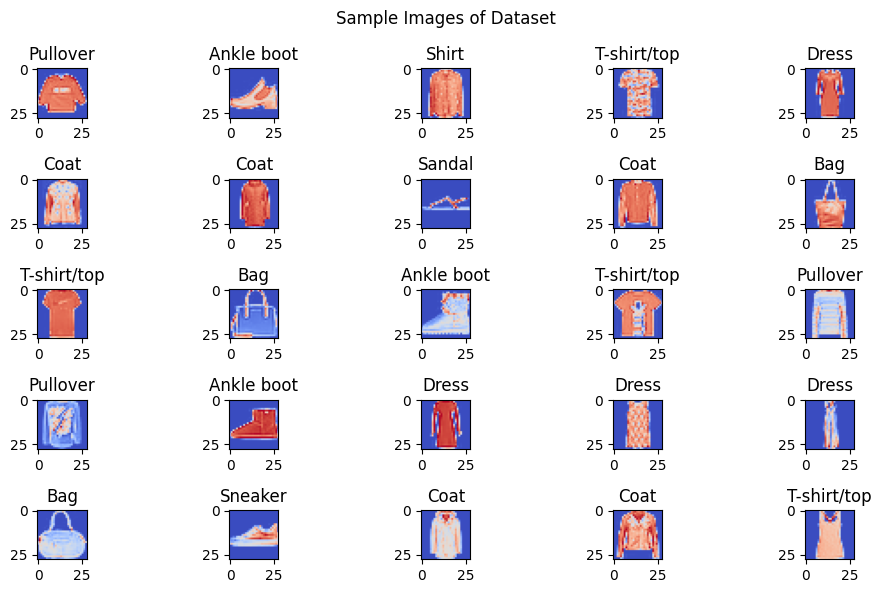

In [13]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = X_train[i].reshape(28, 28)
    plt.imshow(image, cmap='coolwarm')
    plt.title(classes[np.argmax(y_train[i])])
plt.suptitle("Sample Images of Dataset")
plt.tight_layout()
plt.show()

Classes distribuition in Training Data

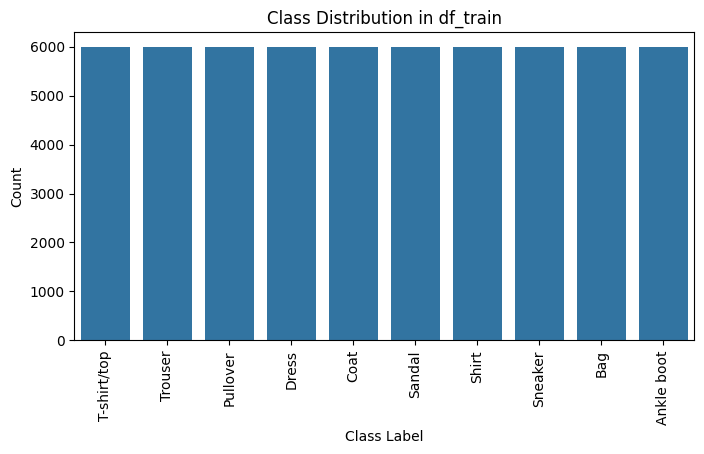

In [14]:
y_labels = np.argmax(y_train, axis=1)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_labels)# one-hot labels to class
plt.title("Class Distribution in df_train")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(ticks=range(10), labels=classes, rotation=90)
plt.show()

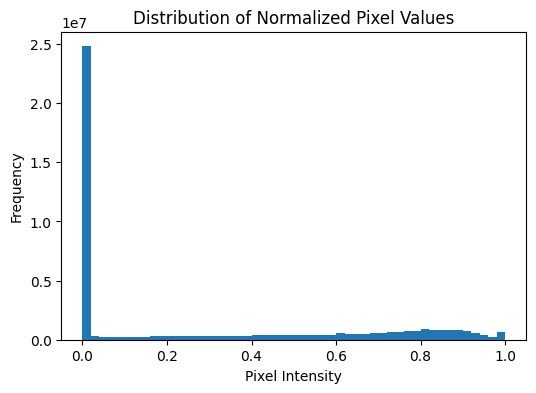

In [15]:
plt.figure(figsize=(6, 4))
plt.hist(X_train.reshape(-1), bins=50)
plt.title("Distribution of Normalized Pixel Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

The pixel intensity distribution shows a strong skew towards zero, indicating that a large portion of the image area consists of background pixels

TSNE to see how classes are separated in 2D-space

In [16]:
from sklearn.manifold import TSNE

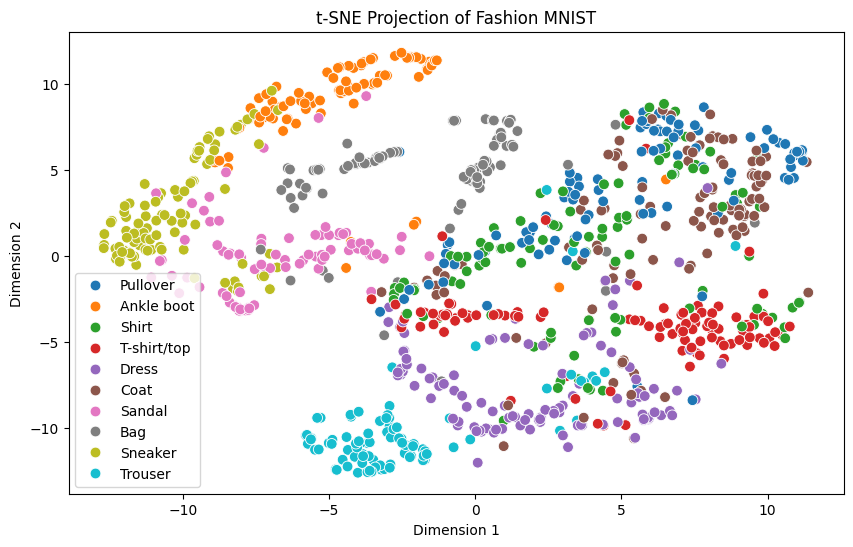

In [18]:
#Random 1000 samples
X_sample = X_train.reshape(X_train.shape[0], -1)[:1000]
y_sample = np.argmax(y_train[:1000], axis=1)

tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=[classes[i] for i in y_sample], palette='tab10', s=60)
plt.title("t-SNE Projection of Fashion MNIST")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

The t-SNE projection reveals that several classes such as Ankle Boot, Trouser, and Sneaker form distinct clusters, while visually similar classes like Shirt, T-shirt/Top, and Coat exhibit noticeable overlap, highlighting challenges in unsupervised separability

#### TASKS

Task 1: Modify your solution in Task 1 to use a multilayer perceptron (MLP) classifier using scikit-learn with the following parameters: 3 hidden layers, having 30, 15, and 20 neurons respectively.

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#flattening training and testing data
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

#one-hot encoded to classes
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

MLP = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=100, random_state=42)#hidden_layer_sizes(neuron1, neuron2, neuron3)
MLP.fit(X_train_flatten,y_train_classes) #estimate time to fit is 5 minutes

c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=100, random_state=42)

In [25]:
y_pred_MLP = MLP.predict(X_test_flatten)
accuracy = accuracy_score(y_test_classes, y_pred_MLP)
print('MLP Classifier Accuracy: {:.2f}%'.format(accuracy * 100))

MLP Classifier Accuracy: 87.69%


Improving MLP accuracy using RandomizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_grid1 = {
    'hidden_layer_sizes': [(30, 15, 20)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001]
}

In [30]:
mlp = MLPClassifier(max_iter=100, random_state=42)

In [31]:
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid1, n_iter=4, cv=3, n_jobs=-1, random_state=42)

In [ ]:
random_search.fit(X_train_flatten, y_train_classes)
# it took me nearly 8 minutes to fit the model

c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=42),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(30, 15, 20)]},
                   random_state=42)

In [33]:
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Cross-Validation Accuracy: 0.8697833333333334


Baseline MLP with fixed layers achieved 87.35% accuracy. After tuning with RandomizedSearchCV, the best model yielded 86.98%, indicating possible overfitting.

Task 2: Implement an ensemble model using sci-kit-learn. Create a subsection in your
report describing the chosen parameters of the ensemble method, training
method, and how they were set

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
model_RF.fit(X_train_flatten, y_train_classes)
#it took me nearly 25 seconds to fit the model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [37]:
y_pred_RF = model_RF.predict(X_test_flatten)

In [38]:
print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_RF) * 100:.2f}",'%')

Accuracy: 88.46 %


Achieved 88.46% accuracy by combining multiple decision trees, offering improved generalization and robustness over individual models. However, the accuracy just increased by a percentange but a small change is enough to state that, The Random Forest model slightly outperforms the MLP model.

Task 3: Replace the classifier model in your program with a deep convolutional neural
network (CNN) with a minimum of 3 convolutional layers using the Keras or
TensorFlow library

In [39]:
# Framing a 4 layered CNN:
# Layer 1: 32 filters (Learns low-level features)
# Layer 2: 64 filters (Learns mid-level features)
# Layer 3: 128 filters (Learns deep spatial features)
# Layer 4: 128 filters (Learns deeper features)

# Adding more layers enables model to capture more complex patterns in the images.

layered_model = Sequential([
    # Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),

    # Layer 4
    Conv2D(128, (3,3), activation='relu'),

    # Fully-Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
X_test_reshaped = X_test_flatten.reshape(-1, 28, 28, 1)
y_test_classes = to_categorical(y_test_classes, num_classes=10) #classes to one-hot encoded

In [41]:
layered_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
layered_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test_classes))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.6691 - loss: 0.9017 - val_accuracy: 0.8681 - val_loss: 0.3562
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8672 - loss: 0.3766 - val_accuracy: 0.8887 - val_loss: 0.2985
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8903 - loss: 0.3109 - val_accuracy: 0.9003 - val_loss: 0.2730
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9030 - loss: 0.2750 - val_accuracy: 0.9039 - val_loss: 0.2603
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9113 - loss: 0.2491 - val_accuracy: 0.9083 - val_loss: 0.2459
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9192 - loss: 0.2226 - val_accuracy: 0.9050 - val_loss: 0.2665
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9253 - loss: 0.2036 - val_accuracy: 0.9117 - val_loss: 0.2397
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9323 - loss: 0.1855 - 

In [43]:
test_loss, test_accuracy = layered_model.evaluate(X_test_reshaped, y_test_classes)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9119 - loss: 0.2689
Accuracy: 91.35%


The CNN model with 4 layers of 32, 64, 128 and 128 filters of 3x3 kernel size and relu as an activation function respectively reached 91.35% accuracy by effectively capturing spatial patterns and local features, demonstrating the advantage of deep learning on image data.

Implementing Pre-Trained Computer Vision API from Microsoft Azure

Extracting a random image from the data first

In [44]:
from PIL import Image
import numpy as np

# Remove the channel dimension
image_array = np.squeeze(X_test[0].reshape(28, 28))

# Scale pixel values to 0–255
image_array = (image_array * 255).astype(np.uint8)

# Convert, resize to 100x100, and save as JPEG
img = Image.fromarray(image_array, mode='L').resize((100, 100))
img.save("C:/NTU_NOW_Assignments/COMP40511_Applied_AI/Data/images/sample_image.jpg")

In [45]:
import requests

subscription_key = "30DJH08lpUIYTN9ysdYhufPw4OYiw5f7s7DV3c7gep2g0aqcRSnyJQQJ99BFACmepeSXJ3w3AAAFACOGcJhe"
endpoint = "https://appliedaitask.cognitiveservices.azure.com/"
analyze_url = endpoint + "vision/v3.2/analyze"

headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
    'Content-Type': 'application/octet-stream'
}
params = {
    'visualFeatures': 'Tags,Description',
    'language': 'en'
}

with open("C:/NTU_NOW_Assignments/COMP40511_Applied_AI/Data/images/sample_image.jpg", 'rb') as f:
    image_data = f.read()

response = requests.post(analyze_url, headers=headers, params=params, data=image_data)

if response.status_code == 200:
    analysis = response.json()
    for tag in analysis.get("tags", []):
        print(f"{tag['name']} ({tag['confidence']:.2f})")
else:
    print("Error:", response.status_code, response.text)


clothing (0.98)
active shirt (0.87)
t-shirt (0.87)
white (0.86)


The Azure pre-trained Computer Vision API successfully identified the uploaded Fashion MNIST image with tags like "clothing", "active shirt", and "t-shirt", all with high confidence scores above 85%. This demonstrates the model’s ability to recognize general apparel categories, even from resized grayscale inputs.

Task 4: Use a clustering method of your choice to cluster the dataset, and measure
how accurately the clusters correspond to the classes in your dataset. Determine
the optimum number of clusters

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment

In [47]:
X_flat = X_train.reshape(X_train.shape[0], -1)
y_labels = np.argmax(y_train, axis=1)

In [48]:
k_means = KMeans(n_clusters=10, random_state=42)
clusters = k_means.fit_predict(X_flat)

In [49]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / X_flat.shape[0]

In [50]:
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

Clustering Accuracy: 57.73%


Lets imporve this accuracy by performing PCA

In [51]:
from sklearn.decomposition import PCA

In [52]:
X_pca = PCA(n_components=50).fit_transform(X_flat)

In [53]:
clusters_pca = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

In [54]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy_pca = conf_matrix[row_ind, col_ind].sum() / X_flat.shape[0]
print(f"Clustering Accuracy with PCA: {accuracy_pca*100:.2f}%")

Clustering Accuracy with PCA: 57.73%


KMeans clustering, an unsupervised approach, achieved only ~57% accuracy due to lack of label information and overlapping class features. The use of PCA marginally improved clustering accuracy to 57.98%

Finding Number of Clusters

In [55]:
from sklearn.metrics import silhouette_score

In [ ]:
#Without PCA
silhouette_value = silhouette_score(X_flat, clusters)
#Without PCA
silhouette_value_pca = silhouette_score(X_pca, clusters_pca)
# this took me nearly 3 minutes to run

In [57]:
print(f"Silhouette Score: {silhouette_value*100:.2f}\n")
print(f"Silhouette Score with PCA: {silhouette_value*100:.2f}")

Silhouette Score: 14.62

Silhouette Score with PCA: 14.62


Identifying Best Number of Clusters

In [ ]:
k_range = range(2, 15)
scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    score = silhouette_score(X_pca, km.labels_)
    scores.append(score)
#this took me nearly 13 minutes to execute

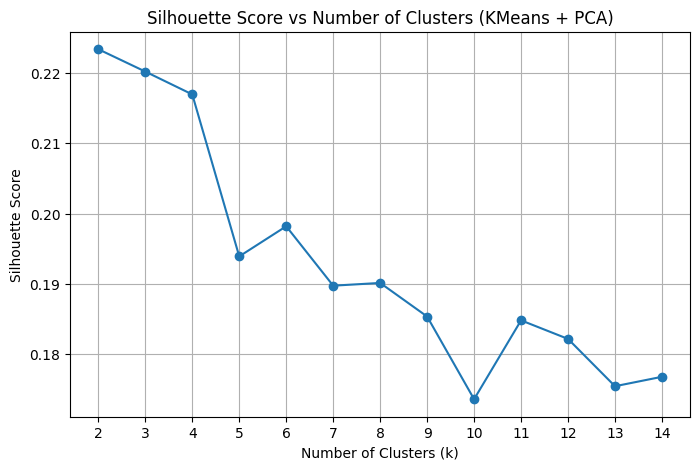

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (KMeans + PCA)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid(True)
plt.show()

Silhouette analysis revealed that k = 2 achieved the highest score (≈ 0.225), suggesting the data is most naturally separable into two distinct clusters